In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram

In [2]:
"""
Enigme 3 : la bibliothèse quantique (algorithme de Grover)
L'algorithme de Grover permet d'effectuer une recherche dans une base de données structurée ou non de façon efficace.
En effet lorsqu'on a beaucoup de donnée que l'on ne peut pas trier ou que le tri devient trop couteux,
on a d'autre choix que de parcourir les données une par une qui est de complexité O(N).
L'algorithme de Grover permet de réduire la complexité à O(sqrt(N)), néanmoins le résultat de la recherche n'est pas correct à 100% mais avec une certaine probabilité.
Il est necessaire de mettre en place une vérification sur le résultat, et dans le cas ou celui-ci est incorrect de relancer l'algorithme jusqu'à obtenir le bon résultat.
"""

"\nEnigme 3 : la bibliothèse quantique (algorithme de Grover)\nL'algorithme de Grover permet d'effectuer une recherche dans une base de données structurée ou non de façon efficace.\nEn effet lorsqu'on a beaucoup de donnée que l'on ne peut pas trier ou que le tri devient trop couteux,\non a d'autre choix que de parcourir les données une par une qui est de complexité O(N).\nL'algorithme de Grover permet de réduire la complexité à O(sqrt(N)), néanmoins le résultat de la recherche n'est pas correct à 100% mais avec une certaine probabilité.\nIl est necessaire de mettre en place une vérification sur le résultat, et dans le cas ou celui-ci est incorrect de relancer l'algorithme jusqu'à obtenir le bon résultat.\n"

In [3]:
"""
Principe de fonctionnement de l'algorithme de Grover:
- Oracle: L'oracle est une opération qui permet d'inverser la phase de l'élement recherhé qui est essentiel avant d'appliquer l'algorithme de diffusion de Grover.
- Diffusion de Grover : Le diffuseur est composé de deux étapes. La première consiste à calculer la moyenne des amplitudes de probabilités,
                        puis de prendre la symétrie par rapport à celle-ci. Ce qui a pour effet d'augmenter la probabilité de l'element identifié et de réduire celle des autres.
=> Ces deux opérations peuvent être répétées plusieurs fois jusqu'à avoir une amplitude suffisante pour l'élement recherché. En effet plus il y a de donnée, plus il faudra réitérer l'algorithme de Grover. Pour N données il est necessaire d'appliquer environ sqrt(N) fois l'opération de Grover, d'où la complexité O(sqrt(N)) car l'opération de Grover est de complexité O(1)
"""

"\nPrincipe de fonctionnement de l'algorithme de Grover:\n- Oracle: L'oracle est une opération qui permet d'inverser la phase de l'élement recherhé qui est essentiel avant d'appliquer l'algorithme de diffusion de Grover.\n- Diffusion de Grover : Le diffuseur est composé de deux étapes. La première consiste à calculer la moyenne des amplitudes de probabilités,\n                        puis de prendre la symétrie par rapport à celle-ci. Ce qui a pour effet d'augmenter la probabilité de l'element identifié et de réduire celle des autres.\n=> Ces deux opérations peuvent être répétées plusieurs fois jusqu'à avoir une amplitude suffisante pour l'élement recherché. En effet plus il y a de donnée, plus il faudra réitérer l'algorithme de Grover. Pour N données il est necessaire d'appliquer environ sqrt(N) fois l'opération de Grover, d'où la complexité O(sqrt(N)) car l'opération de Grover est de complexité O(1)\n"

/home/duincan/Projects/School/info_q/venv/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


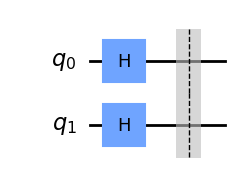

In [4]:
# Implementing the Quantum Circuit
# For a simulated database with 4 elements, we use 2 qubits in a superposition state to represent 4 possible states.

# Creating a quantum circuit with 2 qubits and applying the Hadamard gate to each for state superposition
quantum_circuit = QuantumCircuit(2)
quantum_circuit.h([0, 1])

#Adding a barrier for visual separation in the circuit diagram

quantum_circuit.barrier()
quantum_circuit.draw('mpl')

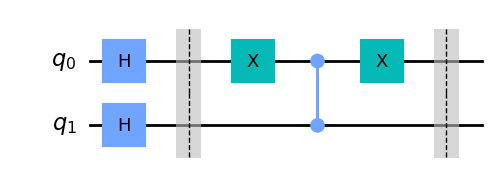

In [5]:
"""
Applying the Oracle:

Target State: '10' (3rd element in our 4-element database)
The Oracle inverts the phase of the target state. For state '10', we want to flip the phase if q1=1 and q0=0.
We use the Controlled-Z (CZ) gate to flip the phase, but first, we need to ensure both qubits are 1. We apply the X (NOT) gate to q0, then CZ, and finally, revert q0 with another X gate.
"""

#Inverting the phase for the target state '10'

quantum_circuit.x(0) # Inverting q0
quantum_circuit.cz(0, 1) # CZ gate to flip the phase of q1 when both qubits are 1
quantum_circuit.x(0) # Reverting q0 to its original state

#Another barrier for clarity

quantum_circuit.barrier()
quantum_circuit.draw('mpl')

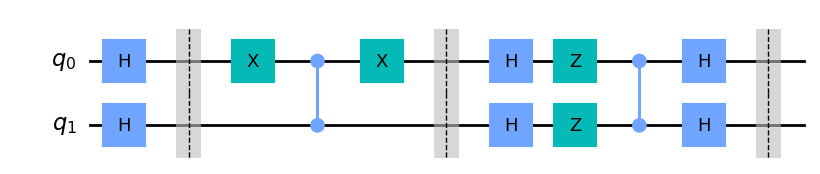

In [6]:
"""
Applying Grover's Diffuser:

The diffuser creates a superposition of all states but with the phase of the initial state inverted.
It enhances the amplitude of the target state while diminishing others.
"""
#Applying Grover's Diffuser

quantum_circuit.h([0, 1]) # Hadamard to both qubits
quantum_circuit.z([0, 1]) # Z-gate to both qubits
quantum_circuit.cz(0, 1) # Controlled-Z for phase flip
quantum_circuit.h([0, 1]) # Hadamard again to complete the diffuser

#Final barrier before measurement
quantum_circuit.barrier()
quantum_circuit.draw('mpl')

In [7]:
quantum_circuit.measure_all()
# circ.measure([])
number_of_measurements = 100_000

quantum_simulator_backend = Aer.get_backend('qasm_simulator')
simulation_job = quantum_simulator_backend.run(transpile(quantum_circuit, quantum_simulator_backend), shots=number_of_measurements)
simulation_results = simulation_job.result()
measurement_counts = simulation_results.get_counts(quantum_circuit)

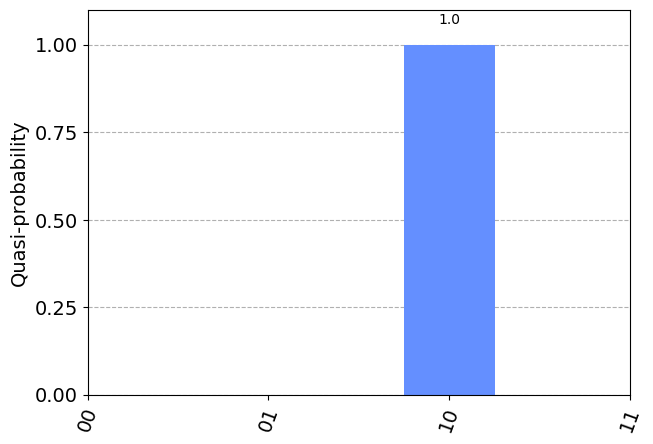

In [8]:
total_qubits = quantum_circuit.num_qubits
all_possible_states = [format(i, '0' + str(total_qubits) + 'b') for i in range(2 ** total_qubits)]
probabilities = {state: measurement_counts.get(state, 0) / number_of_measurements for state in all_possible_states}

plot_histogram(probabilities)

In [9]:
# On observe bien à la fin une probabilité de 100% d'obtenir l'élement indiqué par l'oracle (10).